# Webinar n°1: Pyleecan Basics

This notebook is the support of the first out of three webinars organized by the association [Green Forge Coop](https://www.linkedin.com/company/greenforgecoop/about/) and the UNICAS University. 

The webinars schedule is:
- Friday 16th October 15h-17h (GMT+2): How to use pyleecan (basics)? Pyleecan basics, call of FEMM, use of the GUI
- Friday 30th October 15h-17h (GMT+1): How to use pyleecan (advanced)? Optimization tools, meshing, plot commands
- Friday 6th November 15h-17h (GMT+1): How to contribute to pyleecan? Github projects, Object Oriented Programming

Speakers: Pierre Bonneel, Hélène Toubin, Raphaël Pile from EOMYS.

This webinar will be recorded and the video will be shared on [pyleecan.org](pyleecan.org)

To use this notebook please:
- Install Anaconda
- In Anaconda Prompt run the command "pip install pyleecan"
- Install the latest version of [femm](http://www.femm.info/wiki/Download) (windows only)
- In Anaconda Navigator, lanch Jupyter Notebook
- Jupyter Notebook should open a tab in your web brower, select this notebook to open it

To check if everything is correctly set, please run the following cell (the webinar use pyleecan 1.0.1.post1):

1.0.1.post1


<IPython.core.display.Javascript object>


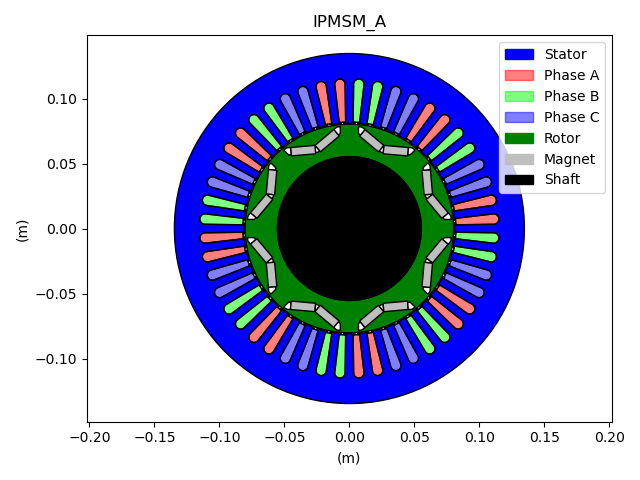

In [1]:
%matplotlib notebook

# Print version of all packages
import pyleecan
print(pyleecan.__version__)

# Load the machine
from os.path import join
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR

IPMSM_A = load(join(DATA_DIR, "Machine", "IPMSM_A.json"))
IPMSM_A.plot()

# Check FEMM installation
from pyleecan.Classes._FEMMHandler import FEMMHandler

femm = FEMMHandler()
femm.openfemm(0)
femm.closefemm()


# 1) How to define a machine

The first step to use pyleecan is to define a machine. This webinar presents the definition of the **Toyota Prius 2004** interior magnet with distributed winding \[1\].

## Type of machines Pyleecan can model
Pyleecan handles the geometrical modelling of main 2D radial flux machines such as:  
- surface or interior permanent magnet machines (SPMSM, IPMSM)  
- synchronous reluctance machines (SynRM)  
- squirrel-cage induction machines and doubly-fed induction machines (SCIM, DFIM)  
- would rotor synchronous machines and salient pole synchronous machines (WSRM)  
- switched reluctance machines (SRM)  

The architecture of Pyleecan also enables to define other kinds of machines (with more than two laminations for instance). More information in our ICEM 2020 pyblication \[2\]

Every machine can be defined by using the **Graphical User Interface** or directly in **Python script**.

## Defining machine with Pyleecan GUI 
The GUI is the easiest way to define machine in Pyleecan. Its purpose is to create or load a machine and save it in JSON format to be loaded in a python script. The interface enables to define step by step in a user-friendly way every characteristics of the machine such as:  
- topology  
- dimensions  
- materials  
- winding  

Each parameter is explained by a tooltip and the machine can be previewed at each stage of the design.


## Start the GUI
The GUI can be started by running the following command in the notebook:

To use it on Anaconda you may need to create the system variable:

QT_QPA_PLATFORM_PLUGIN_PATH : path\to\anaconda3\Lib\site-packages\PySide2\plugins\platforms

In [ ]:
# Start Pyleecan GUI from the Jupyter Notebook
%run -m pyleecan

The GUI can also be launched in a terminal by calling the following command in a terminal:
```
Path/to/python.exe -m pyleecan
```

## load a machine
Once the machine defined in the GUI it can be loaded with the following commands:

<IPython.core.display.Javascript object>


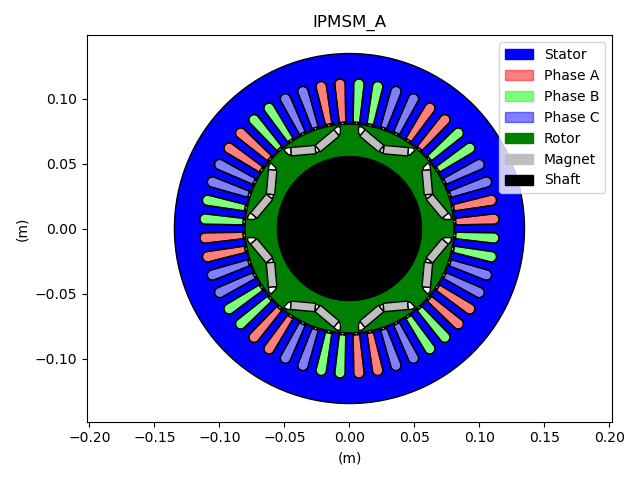

In [2]:
%matplotlib notebook

# Load the machine
from os.path import join
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR

IPMSM_A = load(join(DATA_DIR, "Machine", "IPMSM_A.json"))
IPMSM_A.plot()

## Defining Machine in scripting mode 
Pyleecan also enables to define the machine in scripting mode, using different classes. Each class is defined from a csv file in the folder _pyleecan/Generator/ClasseRef_ and the documentation of every class is available on the dedicated [webpage](https://www.pyleecan.org/pyleecan.Classes.html).
The following image shows the machine classes organization : 

![](https://www.pyleecan.org/_static/machine_classes_UML.png)

Every rotor and stator can be created with the **Lamination** class or one of its daughters.  

![](https://www.pyleecan.org/_static/lamination_classes_UML.png)

The scripting enables to define some complex and exotic machine that can't be defined in the GUI such as this one:

<IPython.core.display.Javascript object>


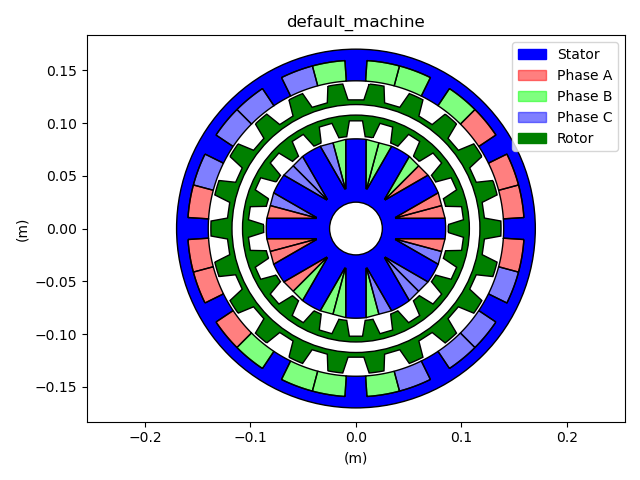

In [3]:
from pyleecan.Classes.MachineUD import MachineUD
from pyleecan.Classes.LamSlotWind import LamSlotWind
from pyleecan.Classes.LamSlot import LamSlot
from pyleecan.Classes.WindingCW2LT import WindingCW2LT
from pyleecan.Classes.SlotW10 import SlotW10
from pyleecan.Classes.SlotW22 import SlotW22
from numpy import pi

machine = MachineUD()

# Main geometry parameter
Rext = 170e-3  # Exterior radius of outter lamination
W1 = 30e-3  # Width of first lamination
A1 = 2.5e-3  # Width of the first airgap
W2 = 20e-3
A2 = 10e-3
W3 = 20e-3
A3 = 2.5e-3
W4 = 60e-3

# Outer stator
lam1 = LamSlotWind(Rext=Rext, Rint=Rext - W1, is_internal=False, is_stator=True)
lam1.slot = SlotW22(
    Zs=12, W0=2 * pi / 12 * 0.75, W2=2 * pi / 12 * 0.75, H0=0, H2=W1 * 0.65
)
lam1.winding = WindingCW2LT(qs=3, p=3)
# Outer rotor
lam2 = LamSlot(
    Rext=lam1.Rint - A1, Rint=lam1.Rint - A1 - W2, is_internal=True, is_stator=False
)
lam2.slot = SlotW10(Zs=22, W0=25e-3, W1=25e-3, W2=15e-3, H0=0, H1=0, H2=W2 * 0.75)
# Inner rotor
lam3 = LamSlot(
    Rext=lam2.Rint - A2,
    Rint=lam2.Rint - A2 - W3,
    is_internal=False,
    is_stator=False,
)
lam3.slot = SlotW10(
    Zs=22, W0=17.5e-3, W1=17.5e-3, W2=12.5e-3, H0=0, H1=0, H2=W3 * 0.75
)
# Inner stator
lam4 = LamSlotWind(
    Rext=lam3.Rint - A3, Rint=lam3.Rint - A3 - W4, is_internal=True, is_stator=True
)
lam4.slot = SlotW10(Zs=12, W0=25e-3, W1=25e-3, W2=1e-3, H0=0, H1=0, H2=W4 * 0.75)
lam4.winding = WindingCW2LT(qs=3, p=3)
# Machine definition
machine.lam_list = [lam1, lam2, lam3, lam4]

# Plot, check and save
machine.plot()

## Stator definition
To define the stator, we initialize a [**LamSlotWind**](http://pyleecan.org/pyleecan.Classes.LamSlotWind.html) object with the different parameters. In pyleecan, all the parameters must be set in SI units.

In [4]:
from pyleecan.Classes.LamSlotWind import LamSlotWind
mm = 1e-3  # Millimeter


# Lamination setup
stator = LamSlotWind(
    Rint=80.95 * mm, # internal radius [m]
    Rext=134.62 * mm, # external radius [m]
    L1=83.82 * mm, # Lamination stack active length [m] without radial ventilation airducts 
                # but including insulation layers between lamination sheets
    Nrvd=0, # Number of radial air ventilation duct
    Kf1=0.95, # Lamination stacking / packing factor
    is_internal=False,
    is_stator=True, 
)

Then we add 48 slots using [**SlotW11**](http://pyleecan.org/pyleecan.Classes.SlotW11.html) which is one of the 25 Slot classes: 

<IPython.core.display.Javascript object>


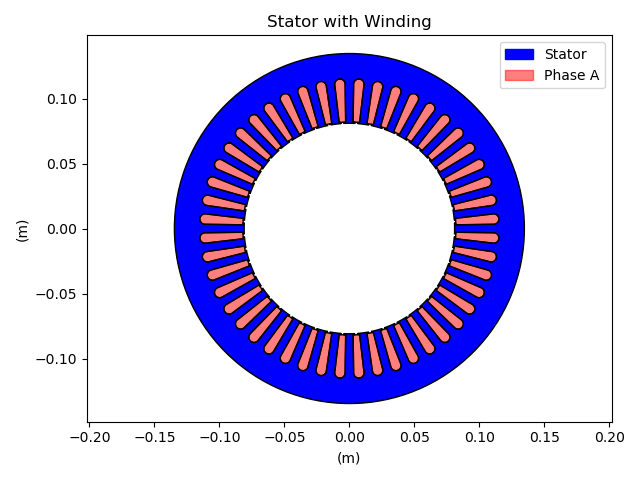

In [5]:
from pyleecan.Classes.SlotW11 import SlotW11

# Slot setup
stator.slot = SlotW11(
    Zs=48, # Slot number
    H0=1.0 * mm,  # Slot isthmus height
    H1=0, # Height
    H2=33.3 * mm, # Slot height below wedge 
    W0=1.93 * mm,  # Slot isthmus width
    W1=5 * mm, # Slot top width
    W2=8 * mm, # Slot bottom width
    R1=4 * mm # Slot bottom radius
)
stator.plot()

As for the slot, we can define the winding and its conductor with [**WindingDW1L**](http://pyleecan.org/pyleecan.Classes.WindingDW1L.html) and [**CondType11**](http://pyleecan.org/pyleecan.Classes.CondType11.html). The conventions for winding are further explained on [pyleecan website](https://pyleecan.org/winding.convention.html)

In [6]:
from pyleecan.Classes.WindingDW1L import WindingDW1L
from pyleecan.Classes.CondType11 import CondType11
# Winding setup
stator.winding = WindingDW1L(
    qs=3,  # number of phases
    Lewout=0,  # staight length of conductor outside lamination before EW-bend
    p=4,  # number of pole pairs
    Ntcoil=9,  # number of turns per coil
    Npcpp=1,  # number of parallel circuits per phase
    Nslot_shift_wind=0,  # 0 not to change the stator winding connection matrix built by pyleecan number 
                         # of slots to shift the coils obtained with pyleecan winding algorithm 
                         # (a, b, c becomes b, c, a with Nslot_shift_wind1=1)
    is_reverse_wind=False # True to reverse the default winding algorithm along the airgap 
                         # (c, b, a instead of a, b, c along the trigonometric direction)
)

# Conductor setup
stator.winding.conductor = CondType11(
    Nwppc_tan=1, # stator winding number of preformed wires (strands) 
                 # in parallel per coil along tangential (horizontal) direction
    Nwppc_rad=1, # stator winding number of preformed wires (strands) 
                 # in parallel per coil along radial (vertical) direction
    Wwire=0.000912, #  single wire width without insulation [m]
    Hwire=2e-3, # single wire height without insulation [m]
    Wins_wire=1e-6, # winding strand insulation thickness [m]
    type_winding_shape=0, # type of winding shape for end winding length calculation
                          # 0 for hairpin windings
                          # 1 for normal windings
)

## Rotor definition

For this example, we use the [**LamHole**](http://www.pyleecan.org/pyleecan.Classes.LamHole.html) class to define the rotor as a lamination with holes to contain magnets.

In the same way as for the stator, we start by defining the lamination:

In [7]:
from pyleecan.Classes.LamHole import LamHole

# Rotor setup
rotor = LamHole(
    Rint=55.32 * mm, # Internal radius
    Rext=80.2 * mm, # external radius
    is_internal=True, 
    is_stator=False,
    L1=stator.L1 # Lamination stack active length [m] 
                 # without radial ventilation airducts but including insulation layers between lamination sheets
)

After that, we can add holes with magnets to the rotor using the class [**HoleM50**](http://www.pyleecan.org/pyleecan.Classes.HoleM50.html): 

In [8]:
from pyleecan.Classes.HoleM50 import HoleM50
rotor.hole = list()
rotor.hole.append(
    HoleM50(
        Zh=8, # Number of Hole around the circumference
        W0=42.0 * mm,  # Slot opening
        W1=0, # Tooth width (at V bottom)
        W2=0, # Distance Magnet to bottom of the V
        W3=14.0 * mm, # Tooth width (at V top)
        W4=18.9 * mm, # Magnet Width
        H0=10.96 * mm, # Slot Depth
        H1=1.5 * mm, # Distance from the lamination Bore
        H2=1 * mm, # Additional depth for the magnet
        H3=6.5 * mm, # Magnet Height
        H4=0, # Slot top height
    )
)

The holes are defined as a list to enable to create several layers of holes and/or to combine different kinds of holes

## Create a shaft and a frame

The classes [**Shaft**](http://www.pyleecan.org/pyleecan.Classes.Shaft.html) and [**Frame**](http://www.pyleecan.org/pyleecan.Classes.Frame.html) enable to add a shaft and a frame to the machine. For this example there is no shaft:

In [9]:
from pyleecan.Classes.Shaft import Shaft
from pyleecan.Classes.Frame import Frame

# Set shaft
shaft = Shaft(Drsh=rotor.Rint * 2, # Diamater of the rotor shaft [m]
                                   # used to estimate bearing diameter for friction losses
              Lshaft=1.2 # length of the rotor shaft [m] 
             )


## Set materials and magnets

Every Pyleecan object can be saved in JSON using the method `save` and can be loaded with the `load` function.
In this example, the materials *M400_50A* and *Copper1* are loaded while the material *Magnet_prius* is created with the classes [**Material**](http://www.pyleecan.org/pyleecan.Classes.Material.html) and [**MatMagnetics**](http://www.pyleecan.org/pyleecan.Classes.MatMagnetics.html).

<IPython.core.display.Javascript object>


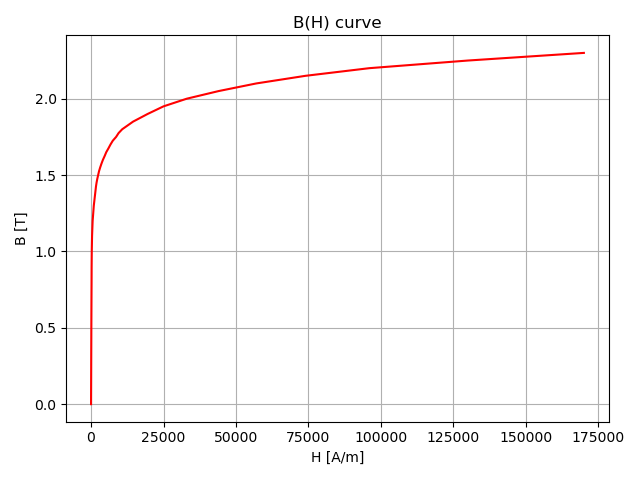

In [10]:
from pyleecan.Classes.Material import Material
from pyleecan.Classes.MatMagnetics import MatMagnetics


# Loading Materials 
M400_50A = load(join(DATA_DIR, "Material", "M400-50A.json"))
Copper1 = load(join(DATA_DIR, "Material", "Copper1.json"))
M400_50A.mag.plot_BH()
# M400_50A.mag.BH_curve  # nonlinear B(H) curve (two columns matrix, H and B(H))

# Defining magnets
Magnet_prius = Material(name="Magnet_prius")

# Definition of the magnetic properties of the material
Magnet_prius.mag = MatMagnetics(
    mur_lin = 1.05, # Relative magnetic permeability
    Hc = 902181.163126629, # Coercitivity field [A/m]
    alpha_Br = -0.001, # temperature coefficient for remanent flux density /°C compared to 20°C
    Brm20 = 1.24, # magnet remanence induction at 20°C [T]
    Wlam = 0, # lamination sheet width without insulation [m] (0 == not laminated)
)

# Definition of the electric properties of the material 
Magnet_prius.elec.rho = 1.6e-06 # Resistivity at 20°C

# Definition of the structural properties of the material
Magnet_prius.struct.rho = 7500.0 # mass per unit volume [kg/m3]


# Set Materials
stator.mat_type = M400_50A
rotor.mat_type = M400_50A
stator.winding.conductor.cond_mat = Copper1

# Set magnets in the rotor hole
rotor.hole[0].magnet_0.mat_type = Magnet_prius
rotor.hole[0].magnet_1.mat_type = Magnet_prius
rotor.hole[0].magnet_0.type_magnetization = 1
rotor.hole[0].magnet_1.type_magnetization = 1

## Create, save and plot the machine
Finally, the Machine object can be created with [**MachineIPMSM**](http://www.pyleecan.org/pyleecan.Classes.MachineIPMSM.html) and saved using the `save` method.

2020-10-20 14:35:56,559-INFO-Pyleecan.Machine: Saving in IPMSM_Toyota_Prius_2004.json


<IPython.core.display.Javascript object>


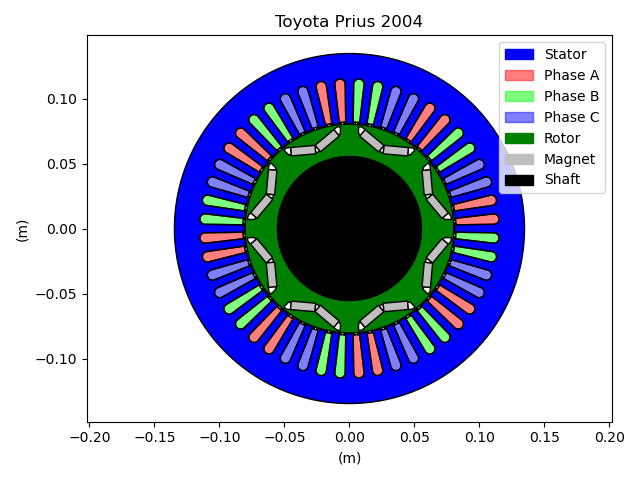

In [11]:
from pyleecan.Classes.MachineIPMSM import MachineIPMSM

%matplotlib notebook
IPMSM_Prius_2004 = MachineIPMSM(
    name="Toyota Prius 2004", 
    stator=stator, 
    rotor=rotor, 
    shaft=shaft, 
    frame=None
)
IPMSM_Prius_2004.save('IPMSM_Toyota_Prius_2004.json')

im=IPMSM_Prius_2004.plot()

Note that Pyleecan also handles ventilation duct thanks to the classes :  
- [**VentilationCirc**](http://www.pyleecan.org/pyleecan.Classes.VentilationCirc.html)  
- [**VentilationPolar**](http://www.pyleecan.org/pyleecan.Classes.VentilationPolar.html)  
- [**VentilationTrap**](http://www.pyleecan.org/pyleecan.Classes.VentilationTrap.html)  

# 2) Magnetic model with FEMM

This part of the webinar shows the different steps to **compute magnetic flux and electromagnetic torque** with pyleecan **automated coupling with FEMM**. Every electrical machine defined in Pyleecan can be automatically drawn in [FEMM](http://www.femm.info/wiki/HomePage) to compute torque, airgap flux and electromotive force.

## Simulation definition
### Inputs

The simulation is defined with a [**Simu1**](http://www.pyleecan.org/pyleecan.Classes.Simu1.html) object. This object corresponds to a simulation with 5 sequential physics (or modules):
- electrical  
- magnetic  
- force  
- structural  
- acoustic  

For now pyleecan includes:
- an Electrical module for PMSM machine with FEMM
- a Magnetic module with FEMM for all machines
- a Force module (Maxwell Tensor) 

[**Simu1**](http://www.pyleecan.org/pyleecan.Classes.Simu1.html) object enforces a weak coupling between each physics: the input of each physic is the output of the previous one.

In this part of the webinar, the Magnetic physics is defined with the object [**MagFEMM**](https://www.pyleecan.org/pyleecan.Classes.MagFEMM.html) and the other physics are deactivated (set to None). 

We define the starting point of the simulation with an [**InputCurrent**](http://www.pyleecan.org/pyleecan.Classes.InputCurrent.html) object to enforce the electrical module output with:
- angular and the time discretization  
- rotor speed  
- stator currents  

In [19]:
from os.path import join

from numpy import ones, pi, array, linspace, cos, sqrt

from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.InputCurrent import InputCurrent
from pyleecan.Classes.MagFEMM import MagFEMM
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR

# Reload machine IPMSM_A
IPMSM_A = load(join(DATA_DIR, "Machine", "IPMSM_A.json"))

# Create the Simulation
simu_femm = Simu1(name="Webinar_1_MagFemm", machine=IPMSM_A)   
p = simu_femm.machine.stator.winding.p
qs = simu_femm.machine.stator.winding.qs

# Defining Simulation Input
simu_femm.input = InputCurrent()

# Rotor speed [rpm]
simu_femm.input.N0 = 2000

# time discretization [s]
time = linspace(start=0, stop=60/simu_femm.input.N0, num=32*p, endpoint=False) # 16 timesteps
simu_femm.input.time = time 

# Angular discretization along the airgap circonference for flux density calculation
simu_femm.input.angle = linspace(start = 0, stop = 2*pi, num=2048, endpoint=False) # 2048 steps 

# Stator currents as a function of time, each column correspond to one phase [A]
I0_rms = 250/sqrt(2) 
felec = p * simu_femm.input.N0 /60 # [Hz]
rot_dir = simu_femm.machine.stator.comp_rot_dir()
Phi0 = 140*pi/180  # Maximum Torque Per Amp

Ia = (
    I0_rms
    * sqrt(2)
    * cos(2 * pi * felec * time + 0 * rot_dir * 2 * pi / qs + Phi0)
)
Ib = (
    I0_rms
    * sqrt(2)
    * cos(2 * pi * felec * time + 1 * rot_dir * 2 * pi / qs + Phi0)
)
Ic = (
    I0_rms
    * sqrt(2)
    * cos(2 * pi * felec * time + 2 * rot_dir * 2 * pi / qs + Phi0)
)
simu_femm.input.Is = array([Ia, Ib, Ic]).transpose()

In this first example stator currents are enforced as a function of time for each phase.

### MagFEMM configuration
For the configuration of the Magnetic module, we use the object [**MagFEMM**](https://www.pyleecan.org/pyleecan.Classes.MagFEMM.html) that computes the airgap flux density by calling FEMM. The model parameters are set though the properties of the [**MagFEMM**](https://www.pyleecan.org/pyleecan.Classes.MagFEMM.html) object. In this tutorial we will present the main ones, the complete list is available by looking at [**Magnetics**](http://www.pyleecan.org/pyleecan.Classes.Magnetics.html) and [**MagFEMM**](http://www.pyleecan.org/pyleecan.Classes.MagFEMM.html) classes documentation.

*type_BH_stator* and *type_BH_rotor* enable to select how to model the B(H) curve of the laminations in FEMM. The material parameters and in particular the B(H) curve are setup directly [in the machine](https://www.pyleecan.org/tuto_Machine.html). 

In [20]:
from pyleecan.Classes.MagFEMM import MagFEMM

simu_femm.mag = MagFEMM(
    type_BH_stator=0, # 0 to use the material B(H) curve, 
                      # 1 to use linear B(H) curve according to mur_lin,
                      # 2 to enforce infinite permeability (mur_lin =100000)
    type_BH_rotor=0,  # 0 to use the material B(H) curve, 
                      # 1 to use linear B(H) curve according to mur_lin,
                      # 2 to enforce infinite permeability (mur_lin =100000)
    file_name = "", # Name of the file to save the FEMM model
)

# We only use the magnetic part 
simu_femm.force = None
simu_femm.struct = None 

Pyleecan coupling with FEMM enables to define the machine with symmetry and with sliding band to optimize the computation time. The angular periodicity of the machine will be computed and (in the particular case) only 1/8 of the machine will be drawn (4 symmetry + antiperiodicity):

In [21]:
simu_femm.mag.is_periodicity_a=True

The same is done for time periodicity only half of one electrical period is calculated (i.e: 1/8 of mechanical period):

In [22]:
simu_femm.mag.is_periodicity_t=True

At the end of the simulation, the mesh and the solution can be saved in the Output object with:

In [23]:
simu_femm.mag.is_get_mesh = True # To get FEA mesh for latter post-procesing
simu_femm.mag.is_save_FEA = False # To save FEA results in a dat file

## Run simulation

In [24]:
out_femm = simu_femm.run()

2020-10-20 14:39:15,920-INFO-Pyleecan.Simulation: Starting Magnetic module


When running the simulation, an FEMM window should open so you can see pyleecan drawing the machine and defining the surfaces. 
![](https://www.pyleecan.org/_static/IPMSM_FEMM.png)
The simulation will compute 16 different timesteps by updating the current and the sliding band boundary condition.

Once the simulation is finished, an Output object is return. The results are stored in the magnetic part of the output (i.e. _out_femm.mag_ ) and different plots can be called. This _out_femm.mag_ contains:   
- *time*: magnetic time vector without symmetry   
- *angle*: magnetic position vector without symmetry   
- *B*: airgap flux density (contains radial and tangential components)   
- *Tem*: electromagnetic torque   
- *Tem_av*: average electromagnetic torque
- *Tem_rip_pp* : Peak to Peak Torque ripple
- *Tem_rip_norm*: Peak to Peak Torque ripple normalized according to average torque   
- *Phi_wind_stator*: stator winding flux   
- *emf*: electromotive force  

Some of these properties are "Data objects" from the [SciDataTool](https://github.com/Eomys/SciDataTool) project. These object enables to handle unit conversion, interpolation, fft, periodicity... They will be introduced more in details in the second webinar.

## Plot results
**Output** object embbed different plots to visualize results easily. A dedicated tutorial is available [here](https://www.pyleecan.org/tuto_Plots.html).

For instance, the radial and tangential magnetic flux in the airgap at a specific timestep can be plotted with:

<IPython.core.display.Javascript object>


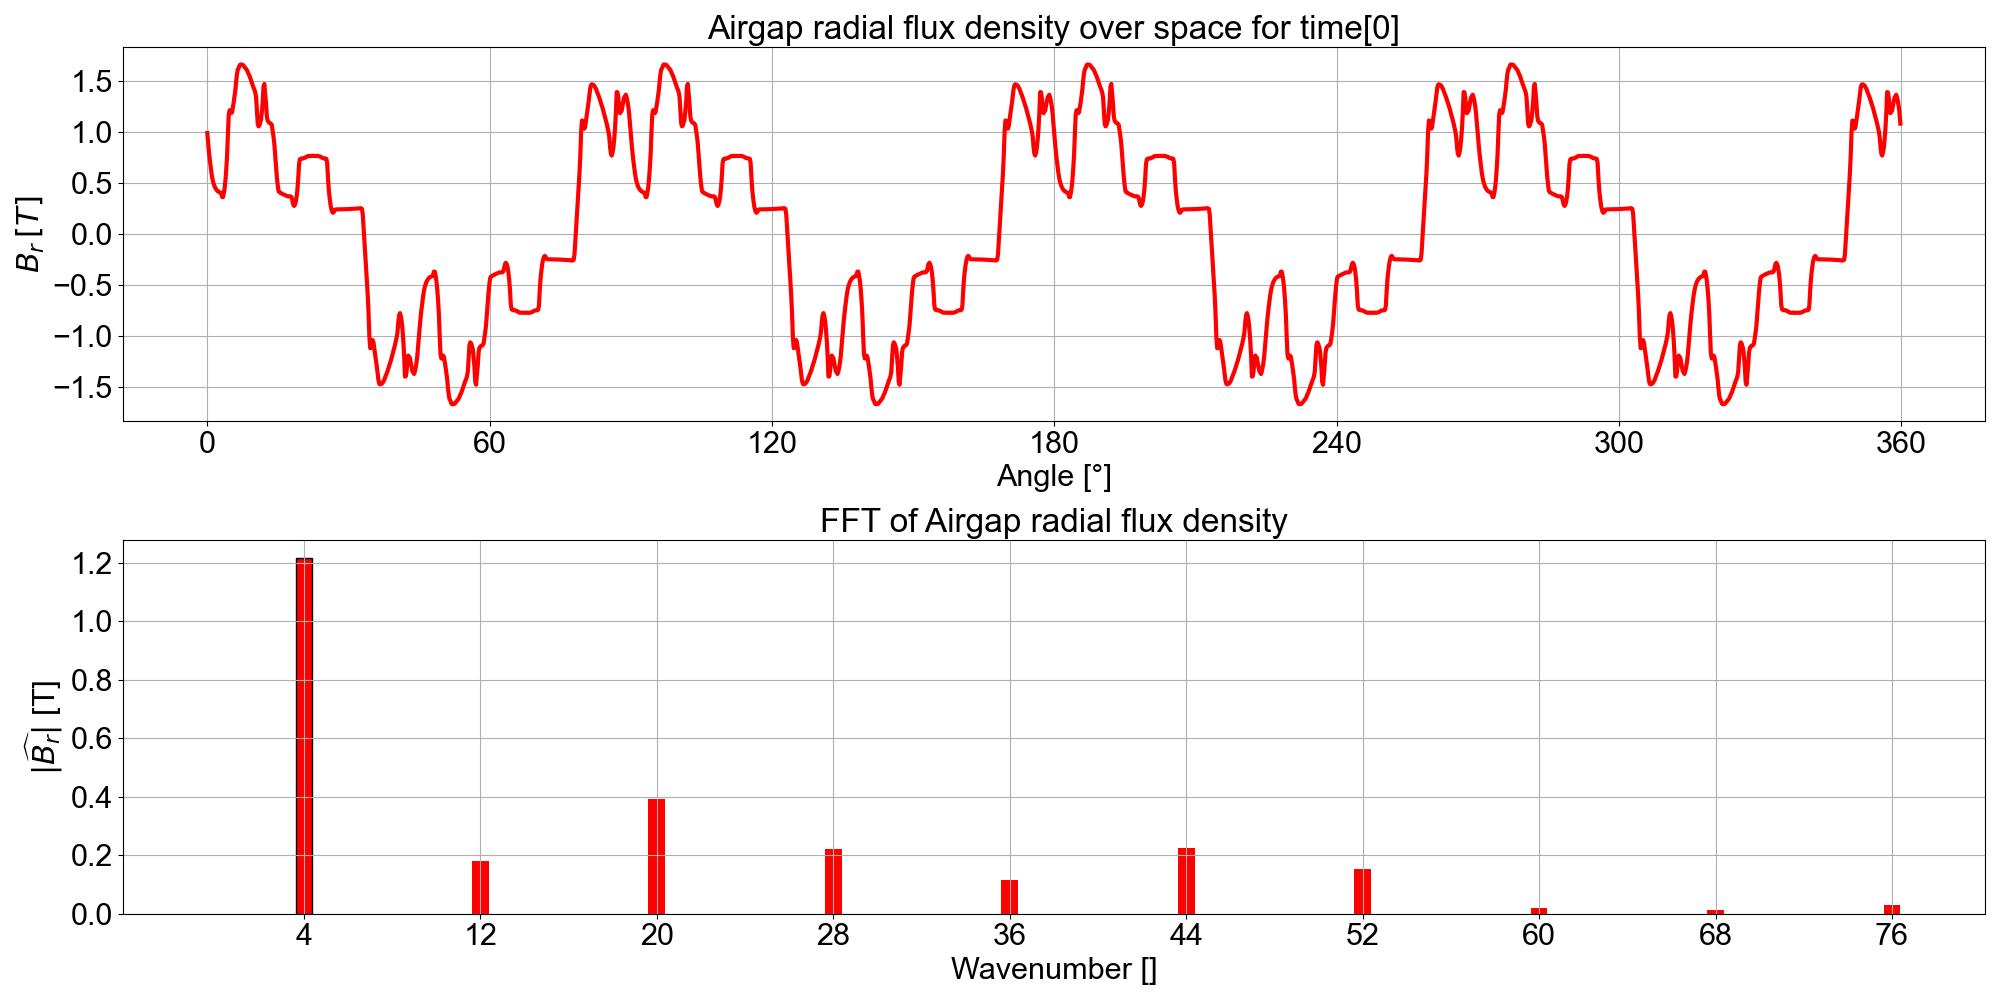

In [26]:
# Radial magnetic flux 
out_femm.plot_A_space("mag.B",component_list=["radial"],t_index=0, is_fft=True, r_max=76)

<IPython.core.display.Javascript object>


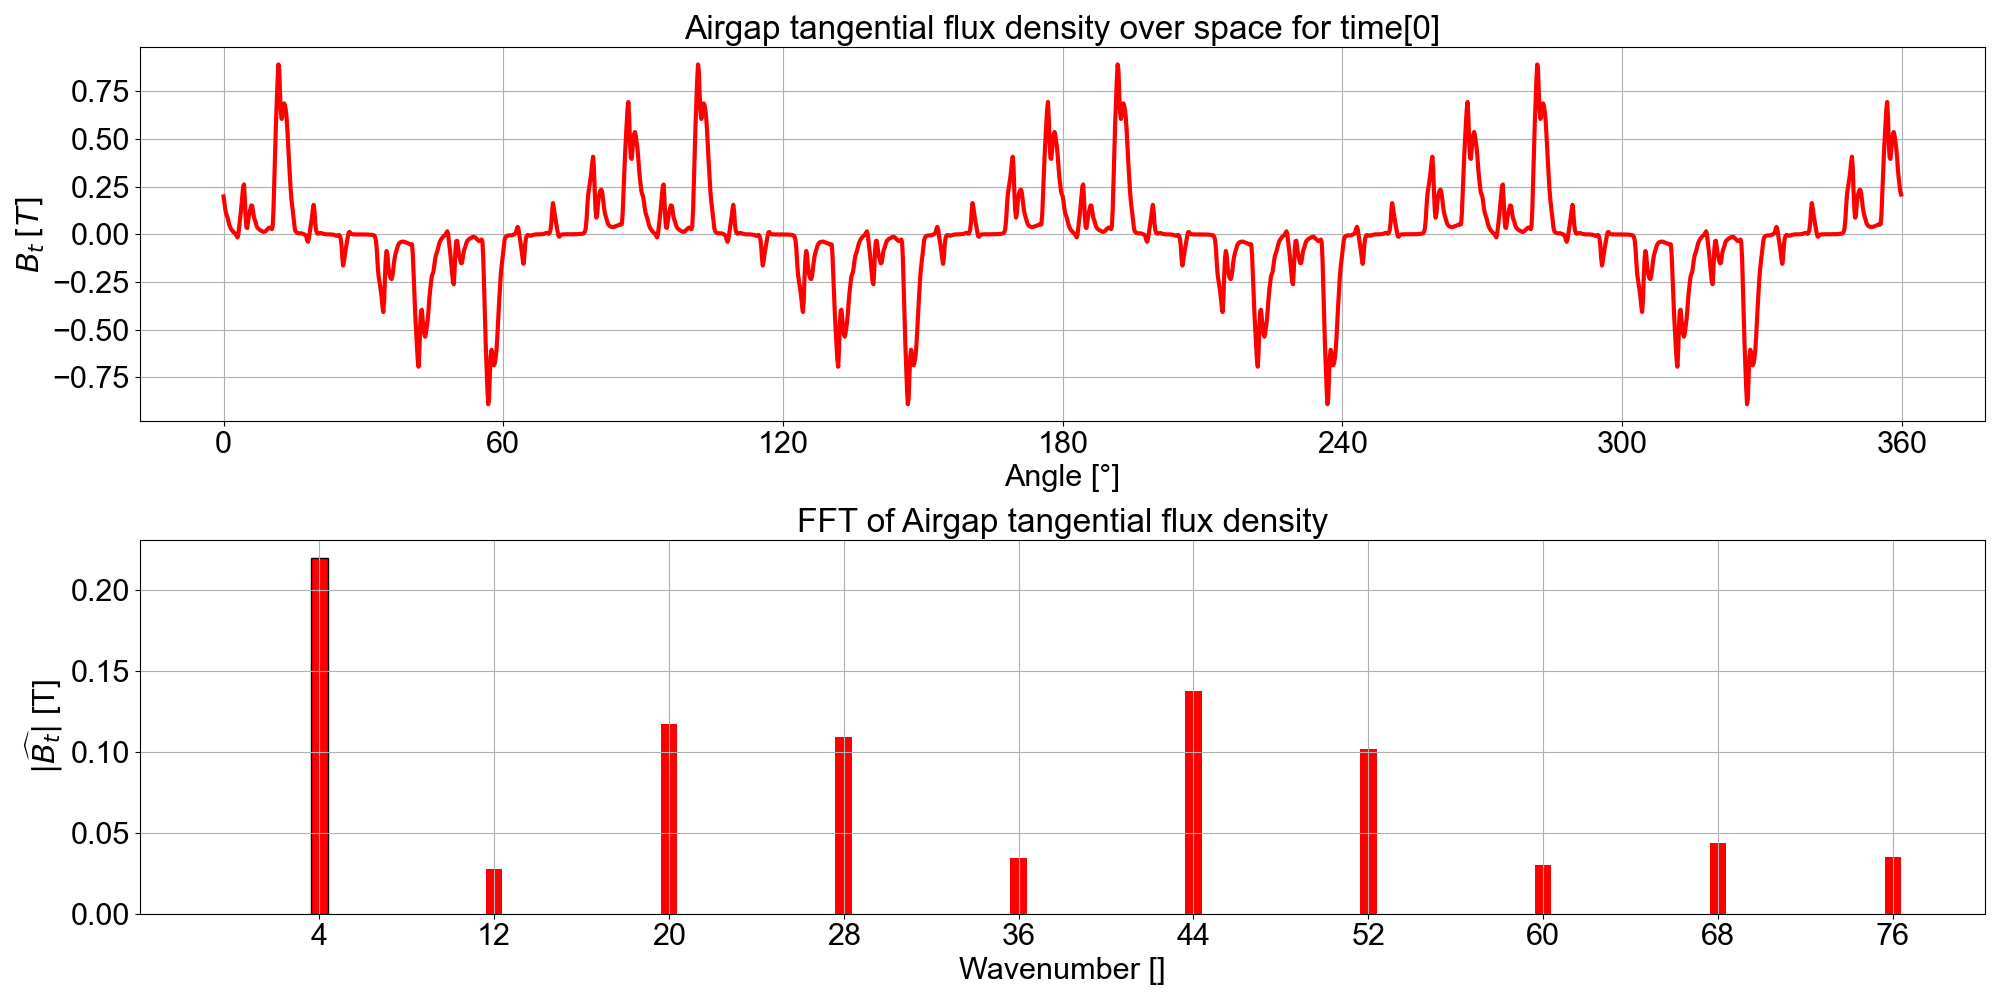

In [27]:
# Tangential magnetic flux 
out_femm.plot_A_space("mag.B",component_list=["tangential"],t_index=0, is_fft=True, r_max=76)

<IPython.core.display.Javascript object>


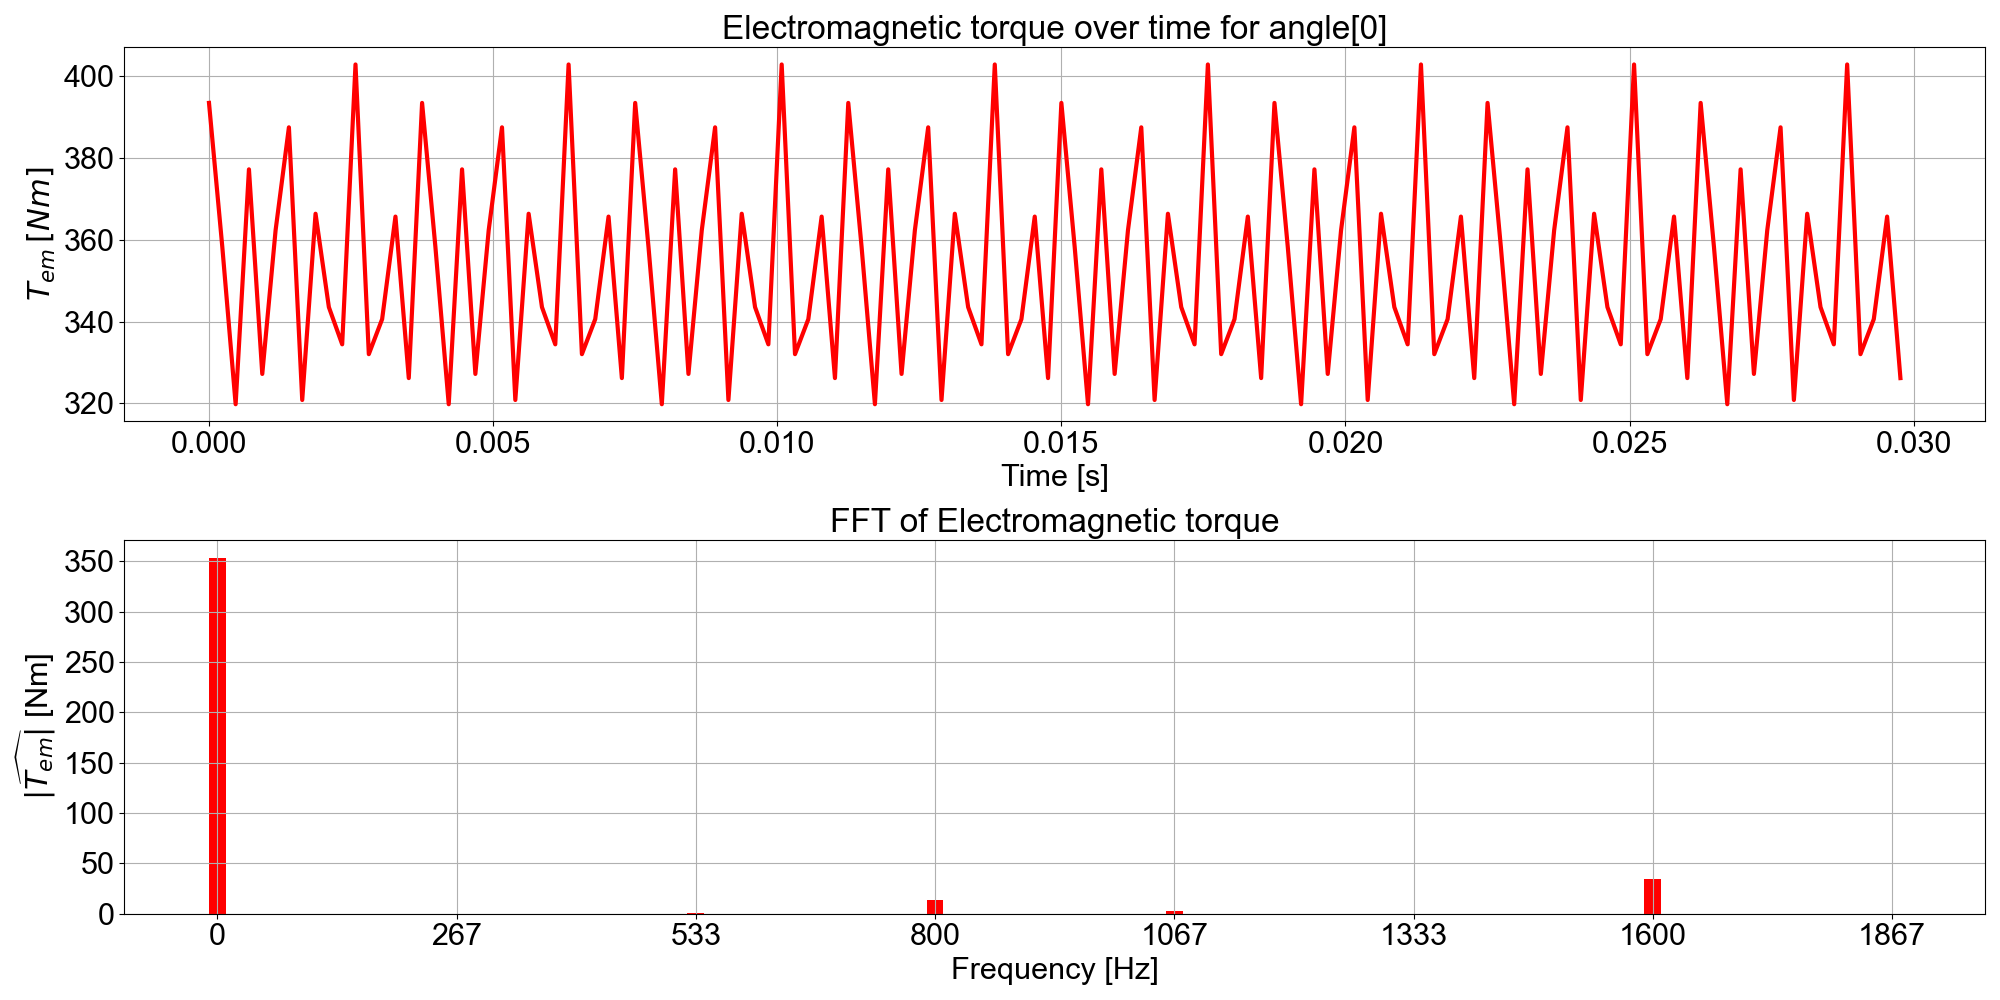

In [28]:
# Torque, one can see that the first torque ripple harmonic is at N0/60*p*6=800 Hz
out_femm.plot_A_time("mag.Tem", is_fft=True)

If the mesh was saved in the output object (mySimu.mag.is_get_mesh = True), it can be plotted with:

In [29]:
out_femm.mag.meshsolution.plot_contour(label="B", group_names="stator")

<IPython.core.display.Javascript object>


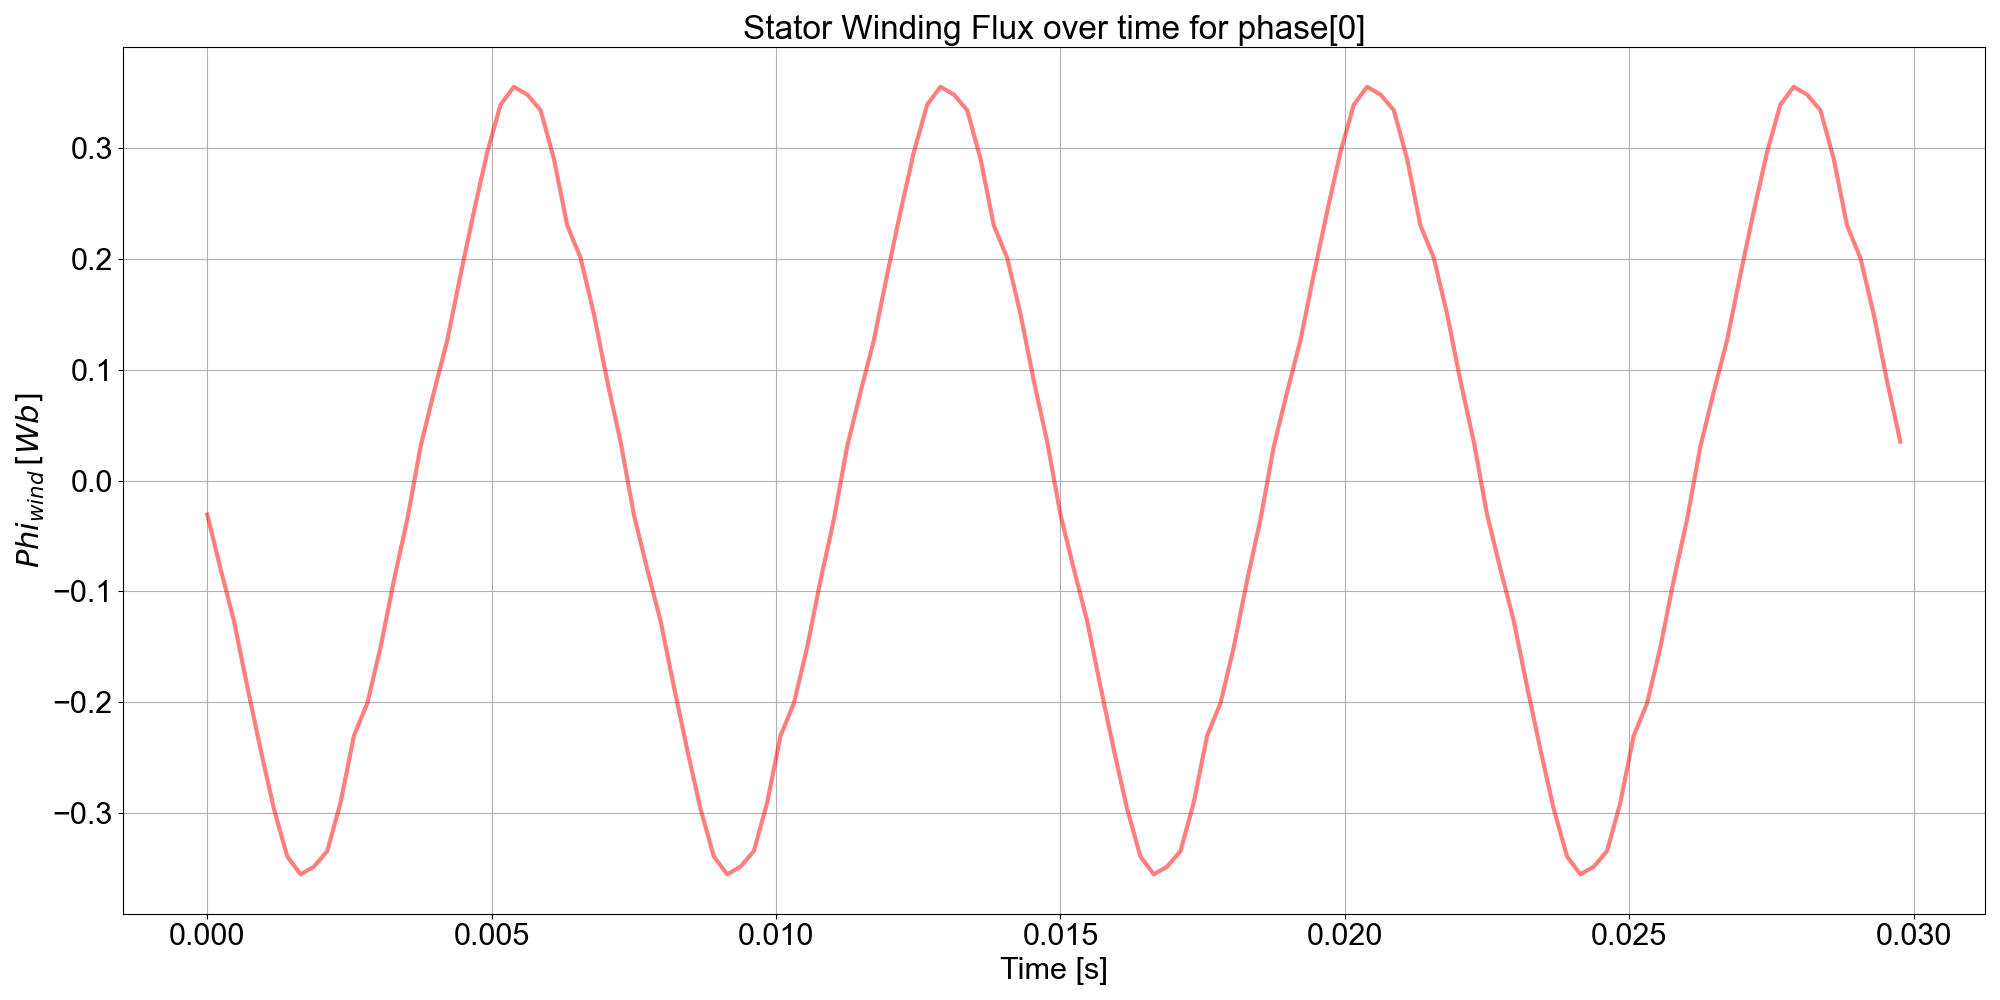

In [30]:
out_femm.plot_A_time("mag.Phi_wind_stator")

# 3) How to set the Operating Point
This part of the webinar explains how to use the object InputCurrent and VarLoadCurrent to run a magnetic simulation on several operating points by setting Id/Iq or I0/Phi0.

The reference used to validate this part of the webinar is \[3\] : Z. Yang, M. Krishnamurthy and I. P. Brown, "Electromagnetic and vibrational characteristic of IPM over full torque-speed range,"

In [31]:
from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.MagFEMM import MagFEMM

# Initialization of the Simulation
simu_op = Simu1(name="Webinar_1_Id_Iq", machine=IPMSM_A)

# Definition of the magnetic simulation (FEMM with symmetry and sliding band)
simu_op.mag = MagFEMM(
    type_BH_stator=0,
    type_BH_rotor=0,
    is_periodicity_a=True,
    is_periodicity_t=True,
    Kgeo_fineness=1,
)
# Run only Magnetic module
simu_op.elec = None
simu_op.force = None
simu_op.struct = None

## Defining an Operating point with Id/Iq
The InputCurrent object enable to create an "OutElec" object that corresponds to the output of the Electrical module and the input of the Magnetic module. In this example, InputCurrent is used to define the starting point with a sinusoidal current defined with Id_ref and Iq_ref:

In [32]:
from pyleecan.Classes.InputCurrent import InputCurrent
from numpy import exp

# Definition of a sinusoidal current
simu_op.input = InputCurrent()
Id_ref = (I0_rms*exp(1j*Phi0)).real
Iq_ref = (I0_rms*exp(1j*Phi0)).imag
simu_op.input.Id_ref = Id_ref # [A] (RMS)
simu_op.input.Iq_ref = Iq_ref # [A] (RMS)
(Id_ref,Iq_ref)

(-135.4188051049254, 113.62986941801093)

The discretization of the current and for the magnetic computation can also be set with the following parameters:

In [33]:
simu_op.input.Nt_tot = 5*8 # Number of time step
simu_op.input.Na_tot = 2048 # Spatial discretization
simu_op.input.N0 = 2000 # Rotor speed [rpm]

When Nt_tot is defined, the time vector is automatically set to:

    linspace(0, 60 / N0 * Nrev, Nt_tot)

With Nrev the number of revolution of the rotor (1 by default)

When Na_tot is defined, the angle vector is automatically set to:

    linspace(0, 2*pi, Na_tot)

The input is now fully defined, the simulation can now be run:

2020-10-20 14:41:36,880-INFO-Pyleecan.Simulation: Starting Magnetic module


<IPython.core.display.Javascript object>


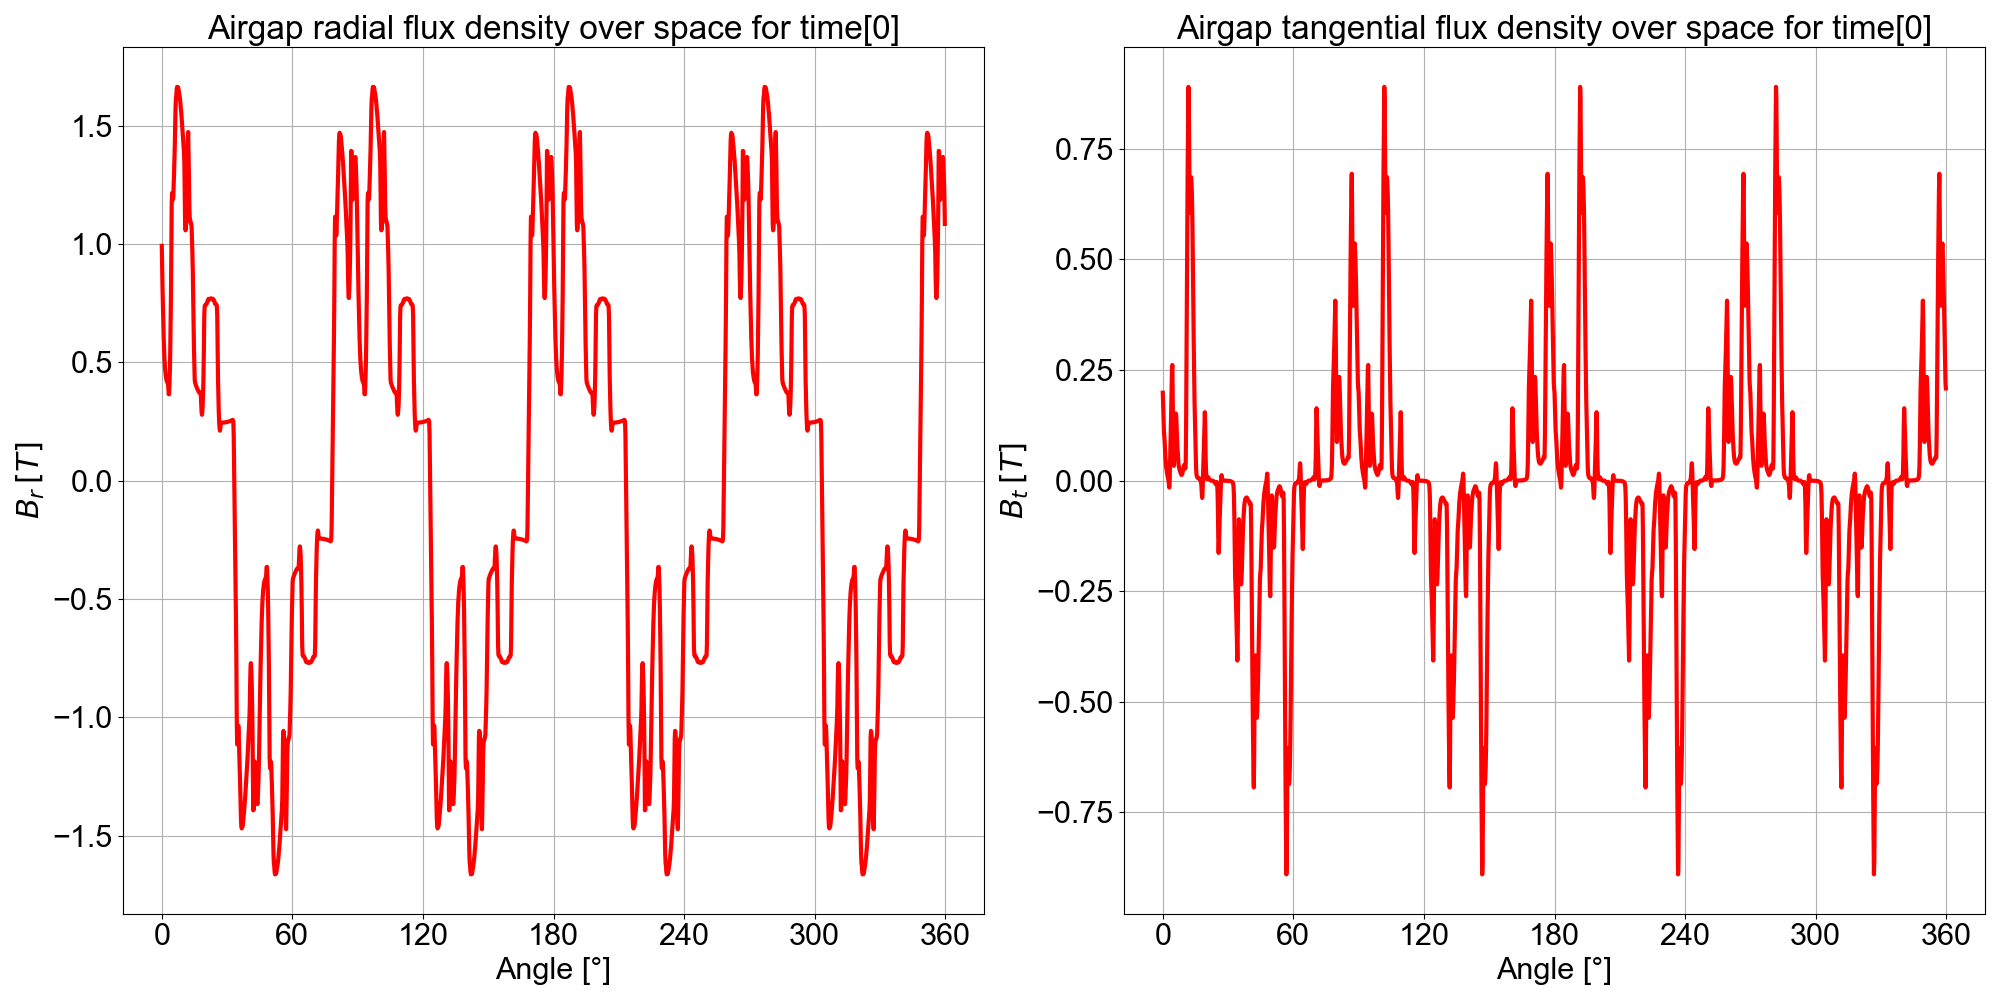

<IPython.core.display.Javascript object>


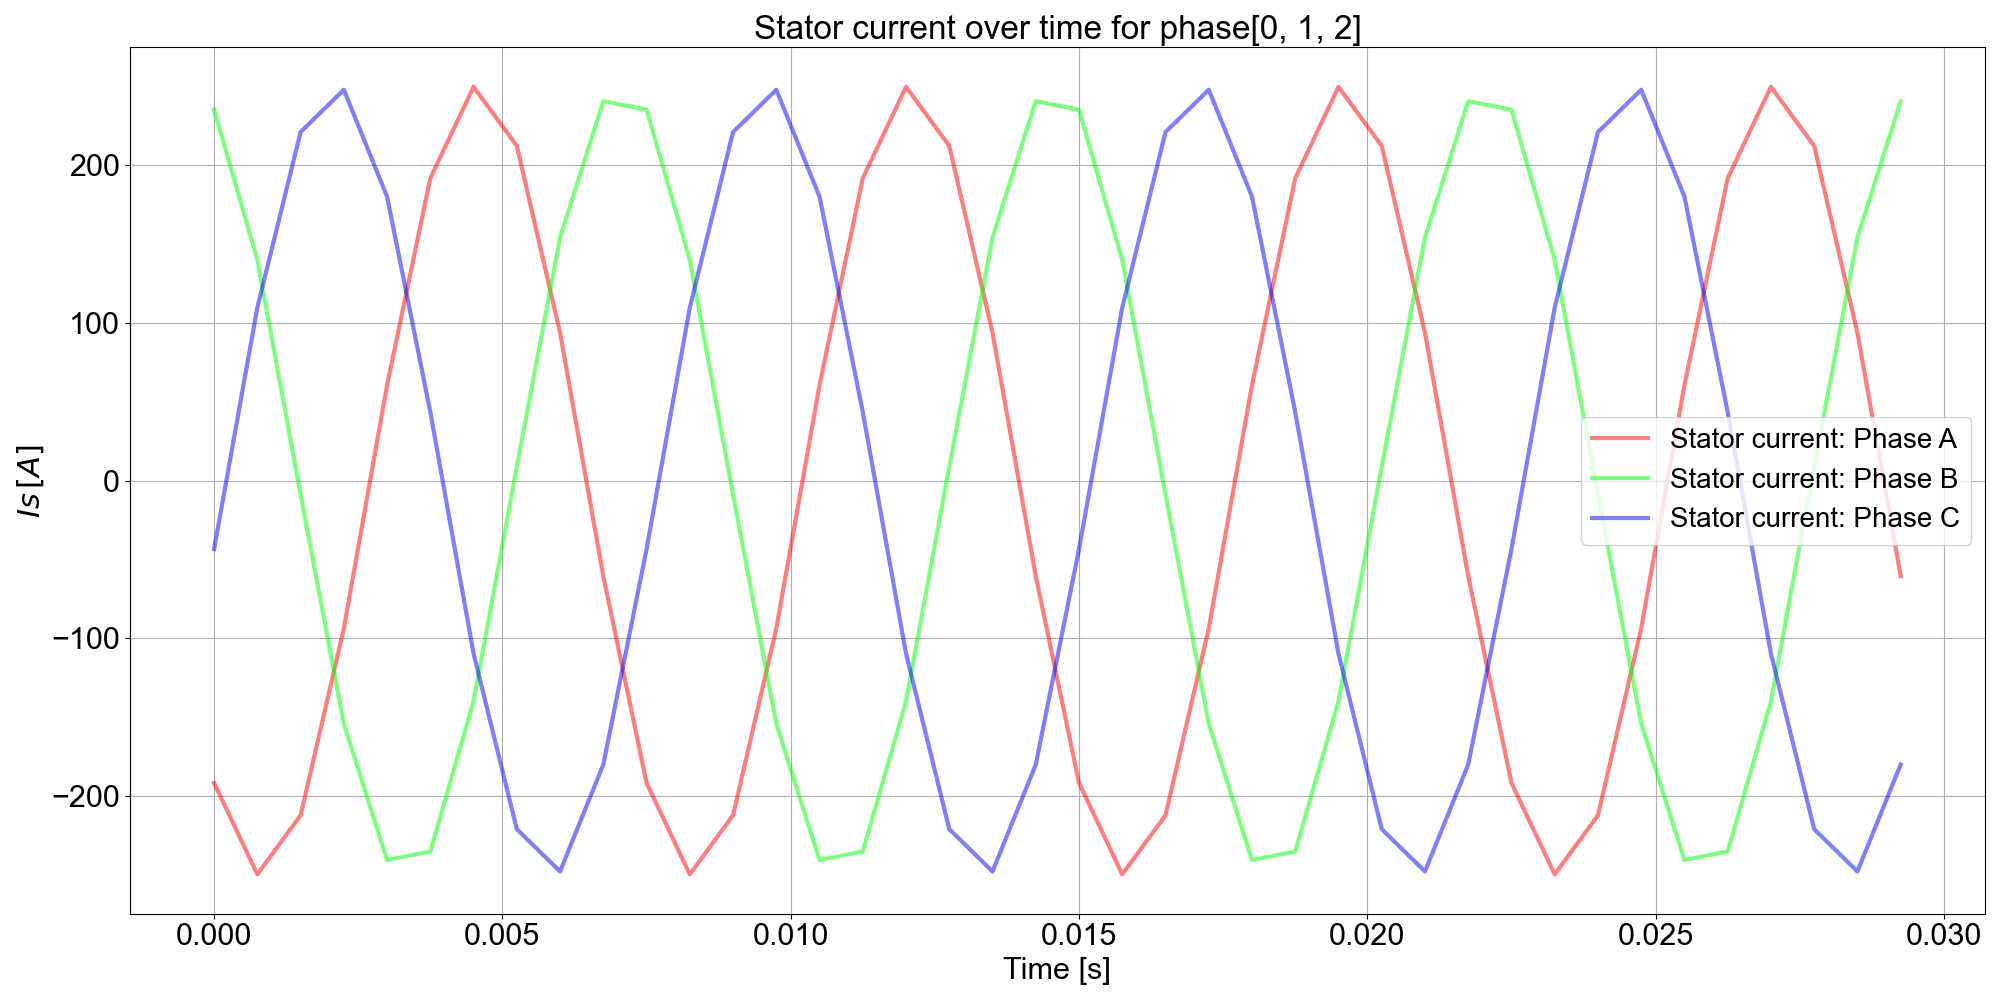

In [34]:
out_op = simu_op.run()
# Plot the flux
out_op.plot_A_space("mag.B")
# Plot the current
out_op.plot_A_time("elec.Is", index_list=[0,1,2])

The Operating Point can also be defined with I0 / Phi0 with (the object properties are still Id_ref and Iq_ref):

In [35]:
from numpy import pi

simu_op.input.set_Id_Iq(I0=I0_rms, Phi0=Phi0)
print("Id: "+str(simu_op.input.Id_ref))
print("Iq: "+str(simu_op.input.Iq_ref))

Id: -135.4188051049254
Iq: 113.62986941801093


## Iterating on several Operating Point
Reference torque and current angle vector are:

In [36]:
from numpy import linspace, array
Tem_av_ref = array([79, 125, 160, 192, 237, 281, 319, 343, 353, 332, 266, 164, 22]) # Yang et al, 2013
Phi0_ref = linspace(60 * pi / 180, 180 * pi / 180, Tem_av_ref.size)

Each pyleecan simulation is assumed to be quasi-static and run on a single operating point (fixed speed). To run a simulation on several operating points two steps are needed: First define a simulation that run correctly on a single operating point (like the one defined above), then define a VarLoadCurrent object. 

The VarLoadCurrent object is defined with a matrix with each line corresponding to an operating point and the column are:
- (N0, I0, Phi0) if type_OP_matrix==0
- (N0, Id, Iq) if type_OP_matrix==1

The following VarLoadCurrent object will run the previous simulation N_simu times by changing the value of Phi0. 

A fourth column can be added by setting is_torque=True. It enables to define the reference torque for the Operating Point. The reference is stored in output.elec.Tem_av_ref, the real computed torque is stored in output.mag.Tem_av.

In [37]:
from pyleecan.Classes.VarLoadCurrent import VarLoadCurrent
from numpy import zeros, ones, linspace, array, sqrt, arange

varload = VarLoadCurrent(is_torque=True, ref_simu_index=0)
varload.type_OP_matrix = 0 # Matrix N0, I0, Phi0

# Choose which operating points to run
step = 2 # step=1 to do all OP
         # step=2 to do 1 OP out of 2 (fastest)    
I_simu = arange(0,Tem_av_ref.size, step) 
N_simu = I_simu.size

# Creating the Operating point matrix
OP_matrix = zeros((N_simu,4))

# Set N0 = 2000 [rpm] for all simulation
OP_matrix[:,0] = 2000 * ones((N_simu))

# Set I0 = 250 / sqrt(2) [A] (RMS) for all simulation
OP_matrix[:,1] = I0_rms * ones((N_simu)) 

# Set Phi0 from 60° to 180°
OP_matrix[:,2] = Phi0_ref[I_simu]

# Set reference torque from Yang et al, 2013
OP_matrix[:,3] = Tem_av_ref[I_simu]

varload.OP_matrix = OP_matrix
print(OP_matrix)

[[2.00000000e+03 1.76776695e+02 1.04719755e+00 7.90000000e+01]
 [2.00000000e+03 1.76776695e+02 1.39626340e+00 1.60000000e+02]
 [2.00000000e+03 1.76776695e+02 1.74532925e+00 2.37000000e+02]
 [2.00000000e+03 1.76776695e+02 2.09439510e+00 3.19000000e+02]
 [2.00000000e+03 1.76776695e+02 2.44346095e+00 3.53000000e+02]
 [2.00000000e+03 1.76776695e+02 2.79252680e+00 2.66000000e+02]
 [2.00000000e+03 1.76776695e+02 3.14159265e+00 2.20000000e+01]]


The original simulation will be duplicated N_simu times with the value of InputCurrent updated according to the matrix.

In [38]:
simu_vop = simu_op.copy()
simu_vop.var_simu = varload.copy()
simu_vop.input.Nt_tot = 5*8

Xout_vop = simu_vop.run()

2020-10-20 14:41:53,981-INFO-Pyleecan.Simulation: Computing reference simulation
2020-10-20 14:41:53,983-INFO-Pyleecan.Simulation: Starting Magnetic module
[=======                                           ]  14%
2020-10-20 14:42:05,498-INFO-Pyleecan.Simulation: Starting Magnetic module
[==============                                    ]  28%2020-10-20 14:42:15,029-INFO-Pyleecan.Simulation: Starting Magnetic module
[=====================                             ]  42%2020-10-20 14:42:26,386-INFO-Pyleecan.Simulation: Starting Magnetic module
[============================                      ]  57%2020-10-20 14:42:37,415-INFO-Pyleecan.Simulation: Starting Magnetic module
[===================================               ]  71%2020-10-20 14:42:48,929-INFO-Pyleecan.Simulation: Starting Magnetic module
[==========================================        ]  85%2020-10-20 14:43:00,875-INFO-Pyleecan.Simulation: Starting Magnetic module
[==================================================

VarLoadCurrent defines a "multi-simulation" that returns an "XOutput" rather than an "Output" object. XOutput is an Output object (all the normal properties are set with the reference simulation results) and some other properties corresponding to the multi-simulation.

Pyleecan will automatically extract some values from each simulation. These values are all gathered in the xoutput_dict:

In [39]:
print("Values available in XOutput:")
print(Xout_vop.xoutput_dict.keys())

print("\nI0 for each simulation:")
print(Xout_vop["I0"].result)
print("\nPhi0 for each simulation:")
print(Xout_vop["Phi0"].result)

Values available in XOutput:
dict_keys(['N0', 'Id', 'Iq', 'I0', 'Phi0', 'Tem_av_ref', 'Tem_av', 'Tem_rip_pp', 'Tem_rip_norm'])

I0 for each simulation:
[176.77669529663686, 176.77669529663683, 176.77669529663683, 176.77669529663686, 176.77669529663686, 176.77669529663683, 176.77669529663686]

Phi0 for each simulation:
[1.0471975511965976, 1.3962634015954636, 1.7453292519943295, 2.0943951023931957, 2.443460952792061, 2.7925268031909276, 3.141592653589793]


Any parameter in the XOutput can be plot as a function of any other

<IPython.core.display.Javascript object>


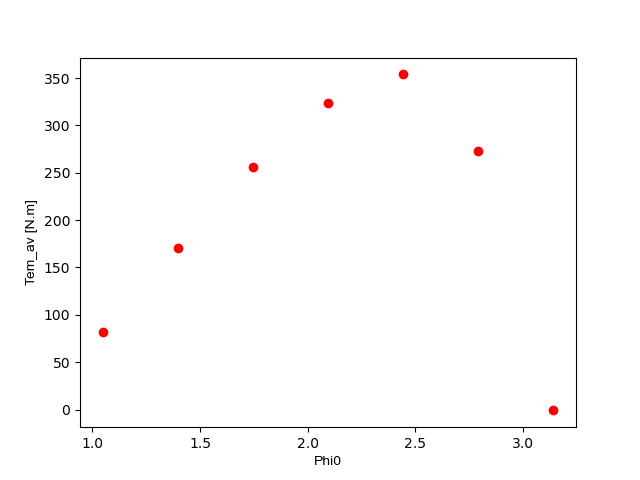

<IPython.core.display.Javascript object>


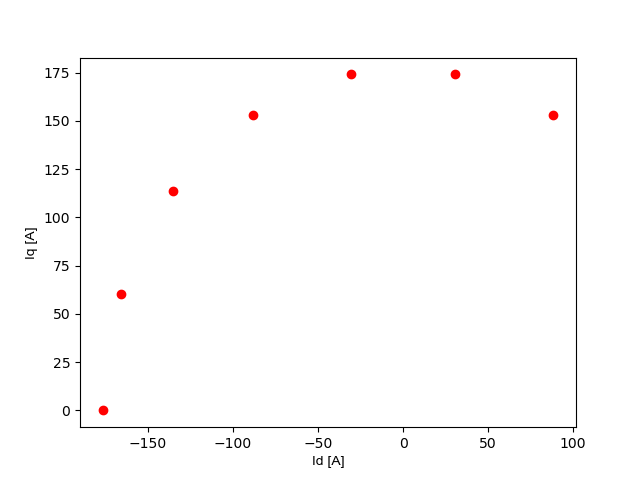

In [40]:
fig = Xout_vop.plot_multi("Phi0", "Tem_av")
fig = Xout_vop.plot_multi("Id", "Iq")

It is possible to select what pyleecan store in the XOutput with "DataKeeper" objects that will be introduced in the second webinar.

Finally, the computed average torque can be compared to the one in the publication from Yang et al (data has been extracted from their graph using [Engauge Digitizer](http://markummitchell.github.io/engauge-digitizer/). Note that the generic plot function `plot_A_2D` has been used here.

<IPython.core.display.Javascript object>


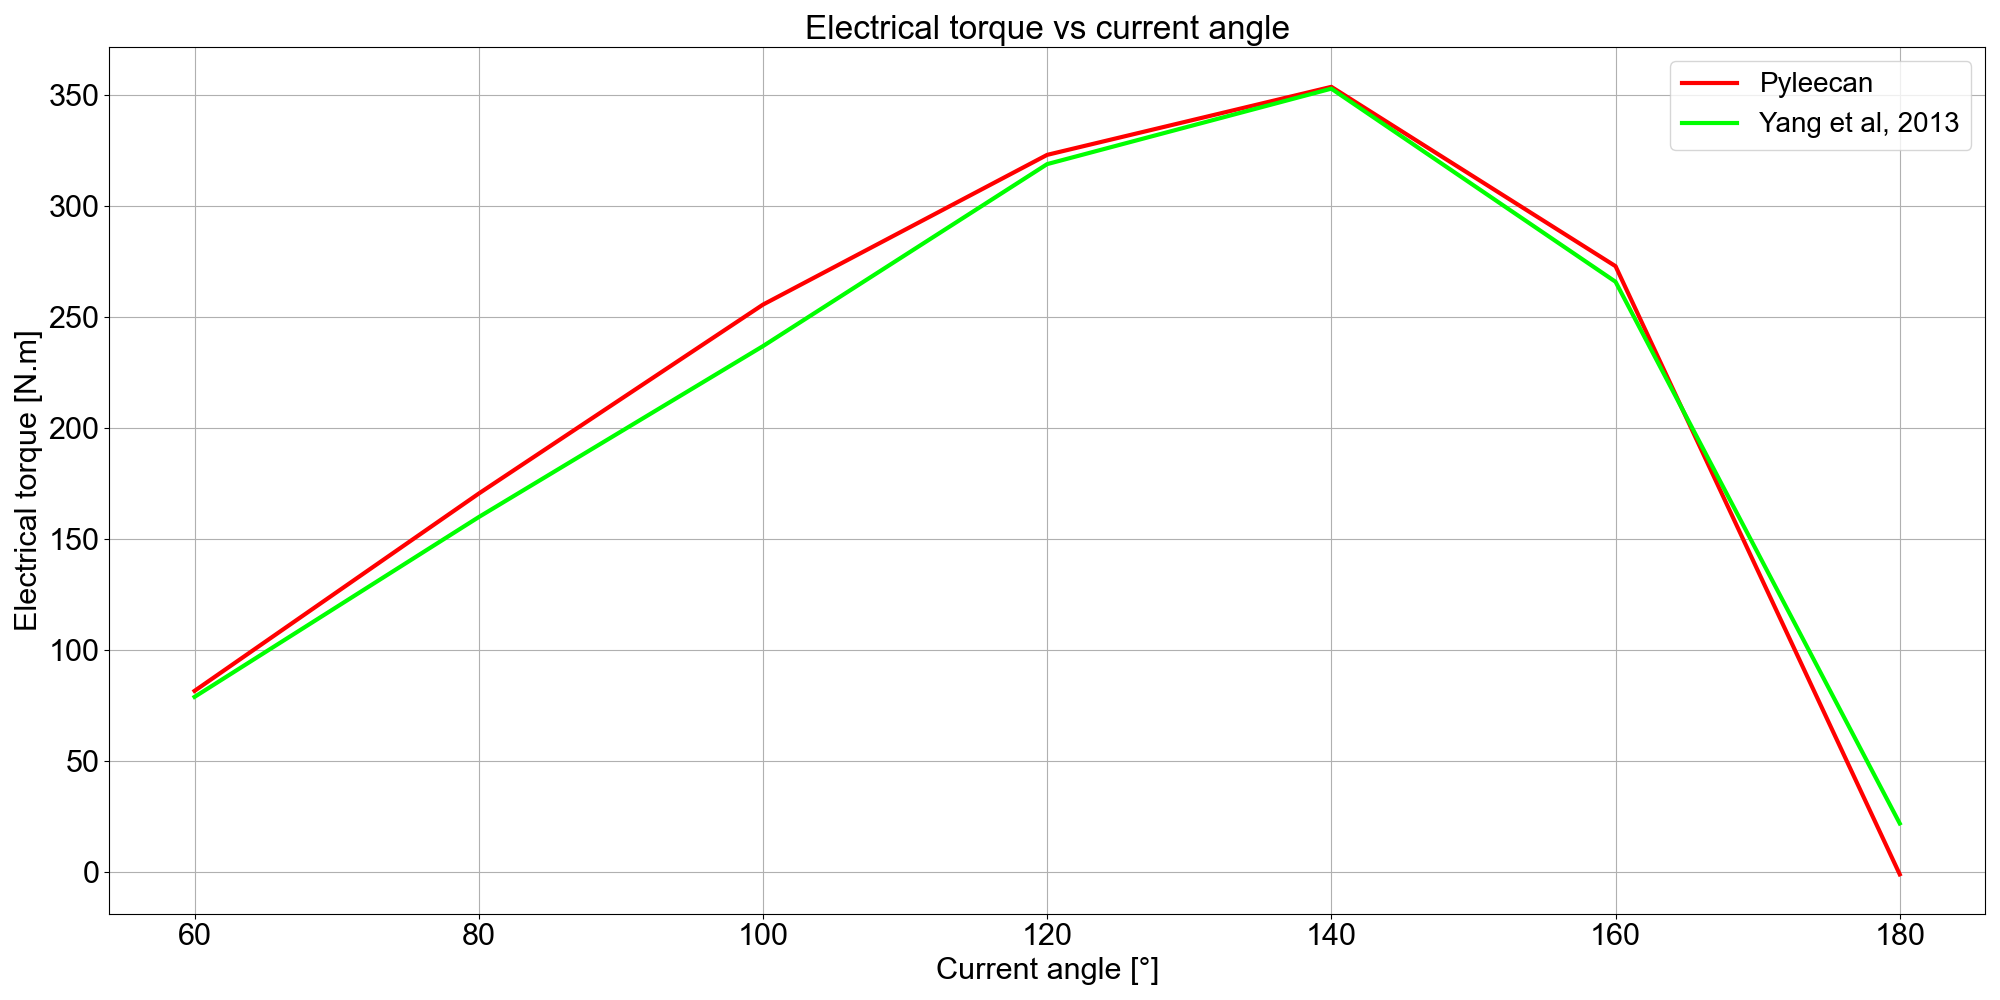

In [41]:
from pyleecan.Functions.Plot.plot_A_2D import plot_A_2D
from pyleecan.definitions import config_dict
from numpy import array

curve_colors = config_dict["PLOT"]["COLOR_DICT"]["CURVE_COLORS"]

plot_A_2D(
    array([x*180/pi for x in Xout_vop.xoutput_dict["Phi0"].result]),
    [Xout_vop.xoutput_dict["Tem_av"].result, Xout_vop.xoutput_dict["Tem_av_ref"].result],
    color_list=curve_colors,
    legend_list=["Pyleecan", "Yang et al, 2013"],
    xlabel="Current angle [°]",
    ylabel="Electrical torque [N.m]",
    title="Electrical torque vs current angle"
)

# 4) How to compute currents, voltage and torque using the Electrical Module

This part of the webinar explains how to use the Electrical Module to compute currents, voltage and torque, using a simple **electrical equivalent circuit**. The idea is to provide insight on how to implement other methods.

The reference used to validate this part is \[3\] : Z. Yang, M. Krishnamurthy and I. P. Brown, "Electromagnetic and vibrational characteristic of IPM over full torque-speed range," 

## Electrical Equivalent Circuit (EEC)
The electrical module is defined with the object EEC_PMSM that correspond to the **electrical equivalent circuit** from "Advanced Electrical Drives, analysis, modeling, control", Rik de doncker, Duco W.J. Pulle, Andre Veltman, Springer edition, is then used for the computation of Ud/Uq or Id/Iq (see schematics hereafter). 

The parameters from the EEC are first computed according to the `FluxLinkFEMM` and `IndMagFEMM` objects. They enable to compute the flux linkage and the magnetic inductances using FEMM simulations (with symmetries and number of time steps). For the flux linkage computation, the currents are set to 0A.

Once the parameter of the EEC known, the voltage can be computed. The electrical torque is then computed according to the formula: $T_{em}=\frac{P-RI^2}{\Omega}$, where $P$ is the magnetic power $P=q_s\Re(VI^*)$

                 <---                               --->
     -----R-----wsLqIq----              -----R-----wsLdId----
    |                     |            |                     |
    |                     |            |                    BEMF
    |                     |            |                     |
     ---------Id----------              ---------Iq----------
             
             --->                               ---> 
              Ud                                 Uq

In [42]:
from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.Electrical import Electrical
from pyleecan.Classes.EEC_PMSM import EEC_PMSM
from pyleecan.Classes.FluxLinkFEMM import FluxLinkFEMM
from pyleecan.Classes.IndMagFEMM import IndMagFEMM

# Initialization of the Simulation
simu_elec = Simu1(name="Webinar_1_elec", machine=IPMSM_A)

# Definition of the magnetic simulation (FEMM with symmetry and sliding band)
simu_elec.elec = Electrical(
    eec=EEC_PMSM(
        indmag=IndMagFEMM(is_periodicity_a=True, Nt_tot=10),
        fluxlink=FluxLinkFEMM(is_periodicity_a=True, Nt_tot=10),
    )
)
# Run only Electrical module
simu_elec.mag = None
simu_elec.force = None
simu_elec.struct = None

## Defining starting point with InputElec or InputCurrent

The starting point of the simulation is defined with InputElec or InputCurrent. These objects will create an "OutElec" object and initialize it with the provided values for Id/Iq, and/or Ud/Uq with InputElec.

Note that Id/Iq are required to accurately compute the magnetic inductances, so that if only Ud/Uq is provided, a current Id=1A and Iq=1A will be used for the computation of Ld and Lq. A more satisfactory method would be to compute a map of Ld and Lq over Id/Iq. Future developments would be welcomed.

In [43]:
from pyleecan.Classes.InputCurrent import InputCurrent
# Definition of a sinusoidal current
simu_elec.input = InputCurrent()
simu_elec.input.Id_ref = Id_ref # [A] (RMS)
simu_elec.input.Iq_ref = Iq_ref # [A] (RMS)
simu_elec.input.Nt_tot = 10 # number of time steps to calculate flux linkage and inductance 
simu_elec.input.Na_tot = 2048 # Spatial discretization
simu_elec.input.N0 = 2000 # Rotor speed [rpm]

## Running the simulation and postprocessings

In [44]:
out_elec = simu_elec.run()

2020-10-20 14:59:23,631-INFO-Pyleecan.Simulation: Starting Electric module
2020-10-20 14:59:23,633-INFO-Pyleecan.Simulation: INFO: Compute flux linkage with FEMM
2020-10-20 14:59:47,386-INFO-Pyleecan.Simulation: INFO: Compute dq inductances with FEMM


In [45]:
# Print voltage and torque
print("Ud: "+str(out_elec.elec.Ud_ref))
print("Uq: "+str(out_elec.elec.Uq_ref))
print("Tem: "+str(out_elec.elec.Tem_av_ref))

Ud: -201.24084060688008
Uq: -12.658880261246352
Tem: 353.65692642334915


<IPython.core.display.Javascript object>


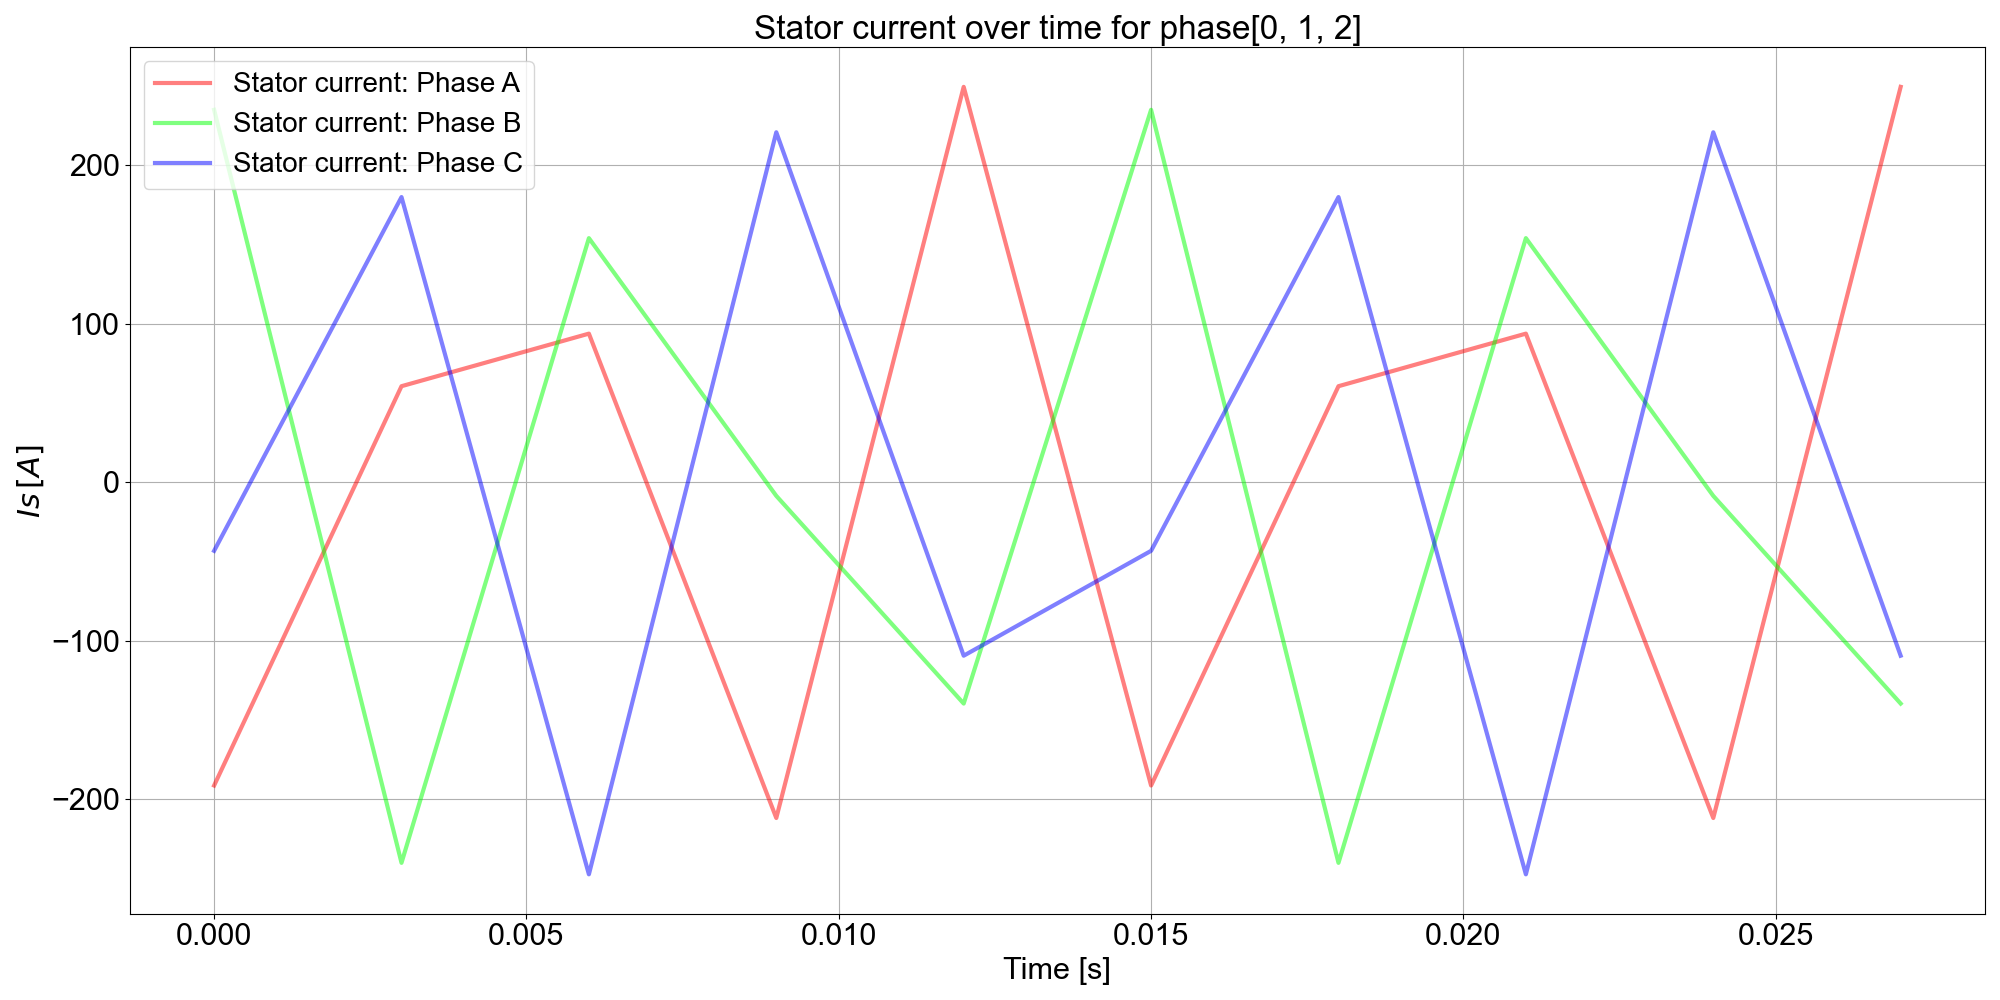

In [46]:
# Plot the currents
out_elec.plot_A_time("elec.Is", index_list=[0,1,2])

<IPython.core.display.Javascript object>


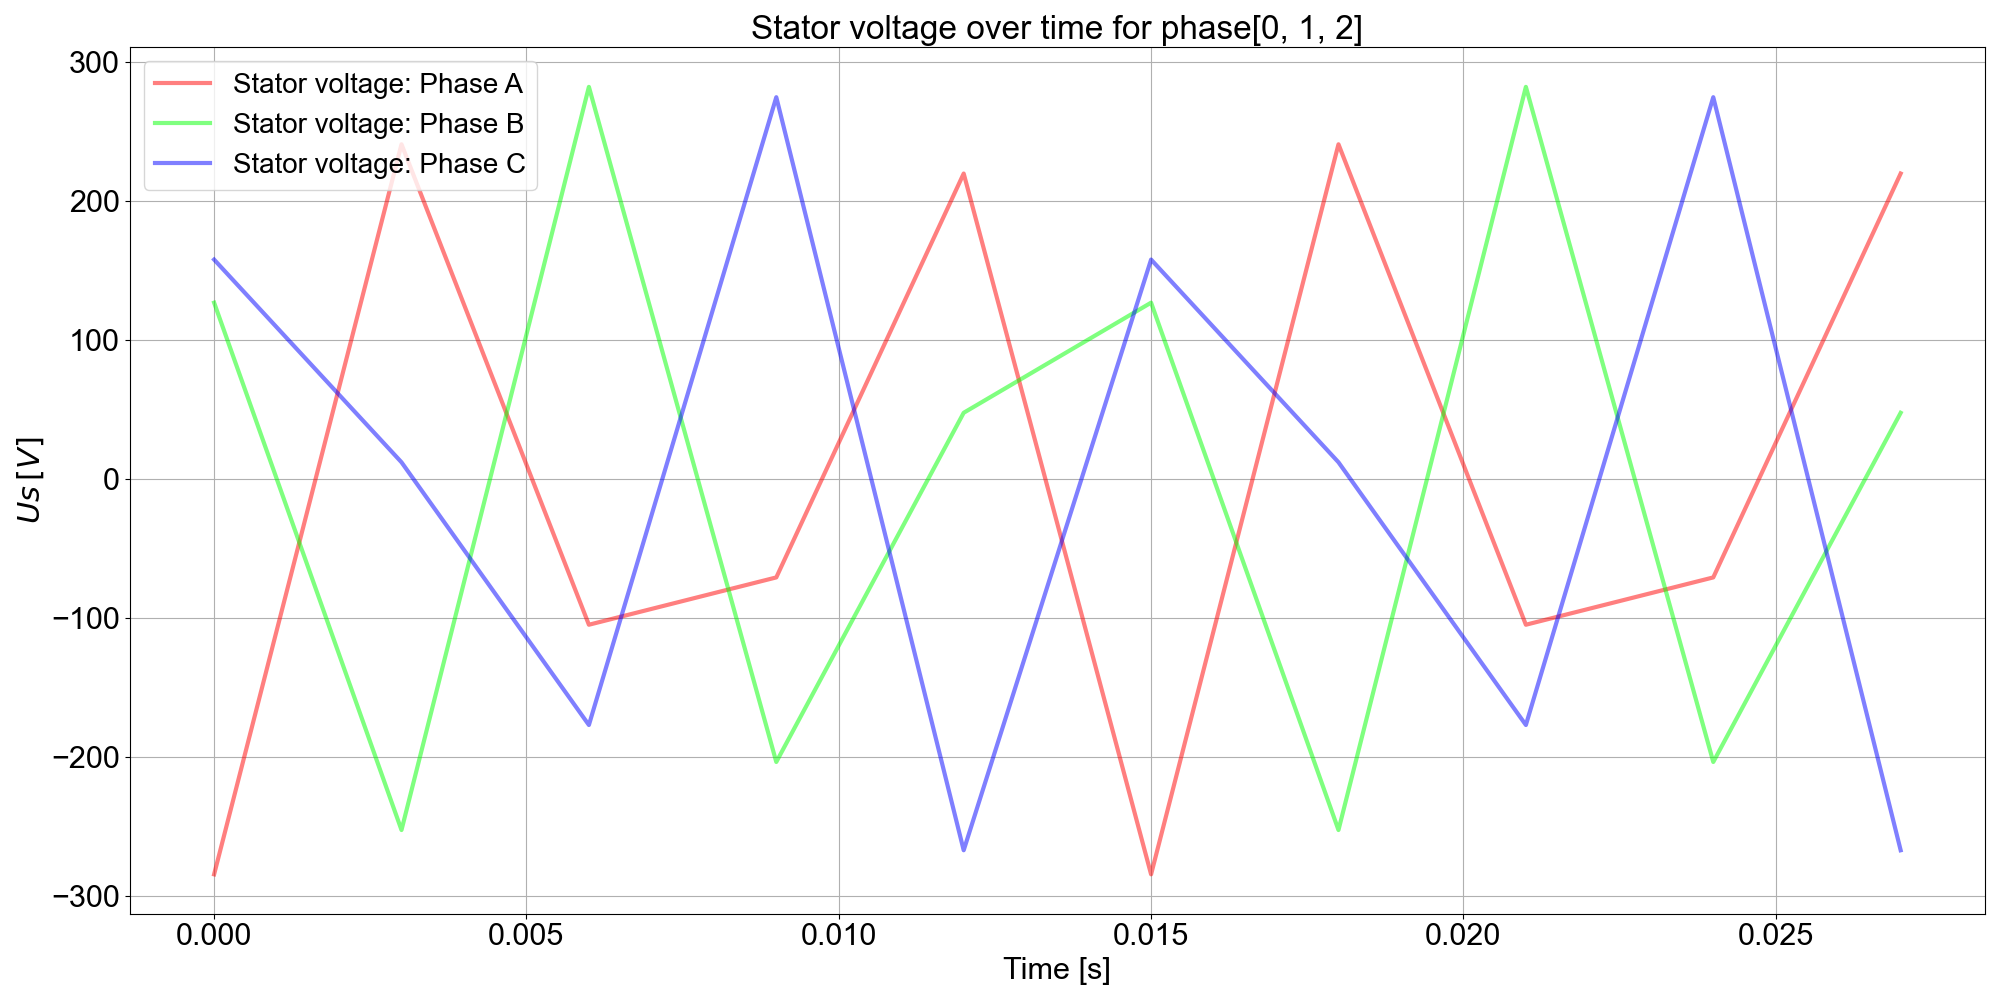

In [47]:
# Plot the voltages
out_elec.plot_A_time("elec.Us", index_list=[0,1,2])

## Iterating on several Operating Points

As in the previous part, VarLoadCurrent can be used to compute the electrical torque (instead of the magnetic torque) on several Operating points.

In [48]:
from pyleecan.Classes.VarLoadCurrent import VarLoadCurrent
from pyleecan.Functions.Plot.plot_A_2D import plot_A_2D
from pyleecan.definitions import config_dict
from numpy import pi, zeros, ones, linspace, array, sqrt

# Run multisimulation
simu_Velec = simu_elec.copy() # copy simulation at fixed speed 
simu_Velec.var_simu = varload.copy() # copy varload calculated in previous cell
simu_Velec.input.Nt_tot = 10   # number of time steps to calculate inductance 
Xout_Velec = simu_Velec.run()

2020-10-20 15:21:57,664-INFO-Pyleecan.Simulation: Computing reference simulation
2020-10-20 15:21:57,667-INFO-Pyleecan.Simulation: Starting Electric module
2020-10-20 15:21:57,668-INFO-Pyleecan.Simulation: INFO: Compute dq inductances with FEMM
[=======                                           ]  14%
2020-10-20 15:22:14,431-INFO-Pyleecan.Simulation: Starting Electric module
2020-10-20 15:22:14,433-INFO-Pyleecan.Simulation: INFO: Compute dq inductances with FEMM
[==============                                    ]  28%2020-10-20 15:22:30,958-INFO-Pyleecan.Simulation: Starting Electric module
2020-10-20 15:22:30,959-INFO-Pyleecan.Simulation: INFO: Compute dq inductances with FEMM
[=====================                             ]  42%2020-10-20 15:22:47,022-INFO-Pyleecan.Simulation: Starting Electric module
2020-10-20 15:22:47,024-INFO-Pyleecan.Simulation: INFO: Compute dq inductances with FEMM
[============================                      ]  57%2020-10-20 15:23:04,135-INFO-Pylee

Once the simulation is done, the torque as a function of Phi0 can be plotted with:

In [ ]:
# Plot torque as a function of Phi0
curve_colors = config_dict["PLOT"]["COLOR_DICT"]["CURVE_COLORS"]

try :    
    # If previous magnetic model has been launched, overlay results
    Ydatas = [Xout_vop.xoutput_dict["Tem_av"].result, Xout_Velec.xoutput_dict["Tem_av_ref"].result, Tem_av_ref[I_simu]]  
    legend_list = ["Pyleecan (FEMM)", "Pyleecan (EEC)", "Yang et al, 2013"]
    linestyle_list=["-","dotted","-"]
except :
    # Compare EEC torque results with reference torque
    Ydatas = [Xout_Velec.xoutput_dict["Tem_av_ref"].result, Tem_av_ref[I_simu]]
    legend_list=["Pyleecan", "Yang et al, 2013"]    
    linestyle_list=["-","-"]

ax = plot_A_2D(
    array([x*180/pi for x in Xout_Velec.xoutput_dict["Phi0"].result]),
    Ydatas,
    color_list=curve_colors,
    legend_list=legend_list,
    linestyle_list = linestyle_list,
    xlabel="Current angle [°]",
    ylabel="Electrical torque [N.m]",
    title="Electrical torque vs current angle"
)

[1] Z. Yang, M. Krishnamurthy and I. P. Brown, "Electromagnetic and vibrational characteristic of IPM over full torque-speed range", *2013 International Electric Machines & Drives Conference*, Chicago, IL, 2013, pp. 295-302.

[2] P. Bonneel, J. Le Besnerais, E. Devillers, C. Marinel, and R. Pile, “Design Optimization of Innovative Electrical Machines Topologies Based on Pyleecan Opensource Object-Oriented Software,” in 24th International Conference on Electrical Machines (ICEM), 2020.

[3] Z. Yang, M. Krishnamurthy and I. P. Brown, "Electromagnetic and vibrational characteristic of IPM over full torque-speed range," 2013 International Electric Machines & Drives Conference, Chicago, IL, 2013, pp. 295-302, doi: 10.1109/IEMDC.2013.6556267.